In [21]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('Fifa 23 Players Data.csv')

In [3]:
df.head()

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Club Name,Wage(in Euro),Release Clause,Club Position,Contract Until,Club Jersey Number,Joined On,On Loan,Preferred Foot,Weak Foot Rating,Skill Moves,International Reputation,National Team Name,National Team Image Link,National Team Position,National Team Jersey Number,Attacking Work Rate,Defensive Work Rate,Pace Total,Shooting Total,Passing Total,Dribbling Total,Defending Total,Physicality Total,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,Freekick Accuracy,LongPassing,BallControl,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle,Goalkeeper Diving,Goalkeeper Handling,GoalkeeperKicking,Goalkeeper Positioning,Goalkeeper Reflexes,ST Rating,LW Rating,LF Rating,CF Rating,RF Rating,RW Rating,CAM Rating,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,169,67,2190,452,Paris Saint-Germain,195000,99900000,RW,2023,30,2021,-,Left,4,4,5,Argentina,https://cdn.sofifa.net/flags/ar.png,RW,10,Low,Low,81,89,90,94,34,64,84,90,70,91,88,95,93,93,90,93,87,76,91,92,95,86,68,70,68,91,44,40,93,94,75,96,20,35,24,6,11,15,14,8,90,90,91,91,91,90,91,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,185,81,2147,455,Real Madrid CF,450000,131199999,CF,2023,9,2009,-,Right,4,4,4,France,https://cdn.sofifa.net/flags/fr.png,ST,19,Medium,Medium,80,88,83,87,39,78,75,92,90,89,88,87,82,73,76,91,79,80,78,92,72,87,79,82,82,80,63,39,92,89,84,90,43,24,18,13,11,5,5,7,91,87,89,89,89,87,91,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,185,81,2205,458,FC Barcelona,420000,172200000,ST,2025,9,2022,-,Right,4,4,5,Poland,https://cdn.sofifa.net/flags/pl.png,ST,9,High,Medium,75,91,79,86,44,83,71,94,91,84,89,85,79,85,70,89,76,75,77,93,82,91,85,76,87,84,81,49,94,81,90,88,35,42,19,15,6,12,8,10,91,85,88,88,88,85,88,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,181,70,2303,483,Manchester City,350000,198900000,CM,2025,17,2015,-,Right,5,4,4,Belgium,https://cdn.sofifa.net/flags/be.png,RF,7,High,High,74,88,93,87,64,77,94,85,55,93,83,88,89,83,93,90,76,73,76,91,78,92,63,88,74,91,75,66,88,94,83,89,68,65,53,15,13,5,10,13,86,88,87,87,87,88,91,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,182,73,2177,470,Paris Saint-Germain,230000,366700000,ST,2024,7,2018,-,Right,4,5,4,France,https://cdn.sofifa.net/flags/fr.png,ST,10,High,Low,97,89,80,92,36,76,78,93,72,85,83,93,80,69,71,91,97,97,93,93,81,88,77,87,76,82,64,38,92,83,80,88,26,34,32,13,5,7,11,6,92,90,90,90,90,90,92,92,84,92,70,66,70,66,57,66,21


In [4]:
# Define a list of features
features = ["Overall", "Potential", "Wage(in Euro)", "Value(in Euro)", "Age"]

In [5]:
# Remove any rows in the DataFrame that contain missing values in the specified features
df = df.dropna(subset=features)

In [48]:
# Calculate the pairwise correlation between columns
corr_matrix = df.corr().abs()

# Set the threshold for correlations to display
threshold = 0.5

# Create a mask to only include correlations above the threshold
mask = np.abs(corr_matrix) >= threshold

# Apply the mask to the correlation matrix
corr_matrix = corr_matrix.where(mask, np.nan)

# Fill the missing values with 0
corr_matrix = corr_matrix.fillna(0)

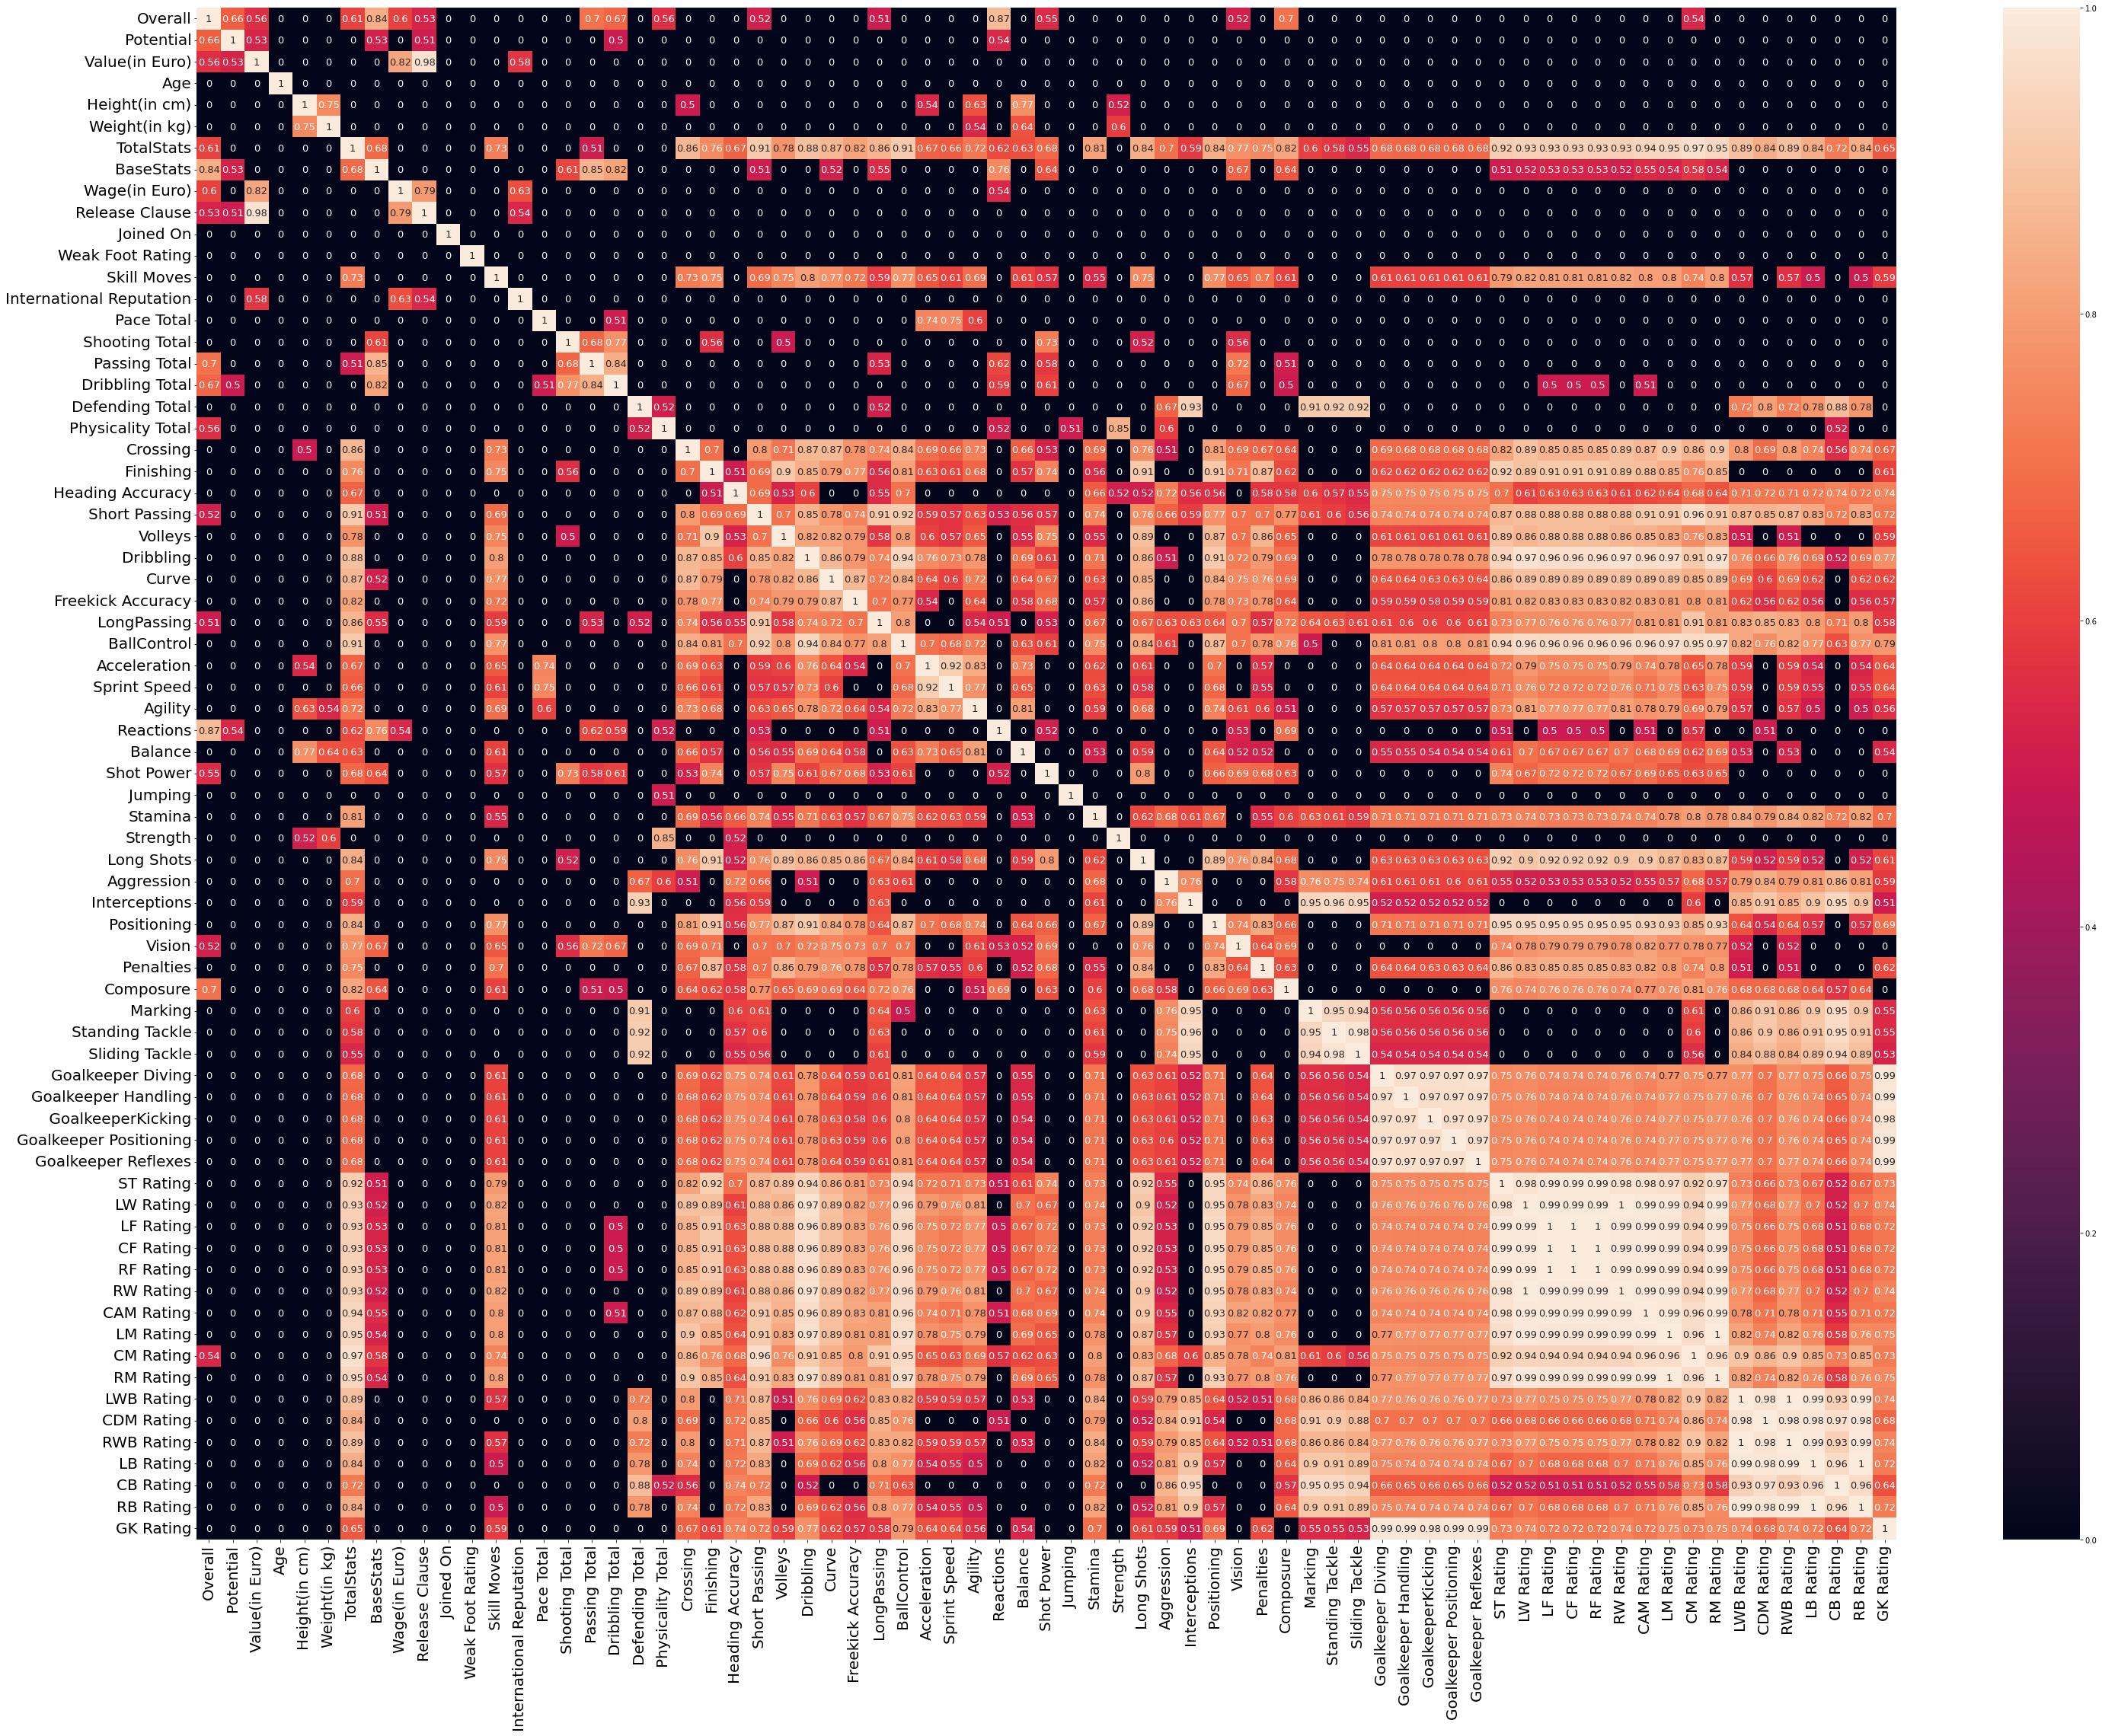

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

width = 50
height = int(width / 1.33)

fig, ax = plt.subplots(figsize=(width, height))
#sns.heatmap(df.corr().abs(), annot=True)
sns.heatmap(corr_matrix, annot=True, annot_kws={"size": 13})
ax.set_xticklabels(ax.get_xticklabels(), fontsize=20)
ax.set_yticklabels(ax.get_xticklabels(), fontsize=20)
plt.show()

In [8]:
# Create a new DataFrame containing only the specified features
data = df[features].copy()

In [9]:
data.head()

,Overall,Potential,Wage(in Euro),Value(in Euro),Age
0,91,91,195000,54000000,35
1,91,91,450000,64000000,34
2,91,91,420000,84000000,33
3,91,91,350000,107500000,31
4,91,95,230000,190500000,23


In [10]:
# Calculate the absolute value of the correlation matrix of the DataFrame
corr = abs(data.corr())

<AxesSubplot:>

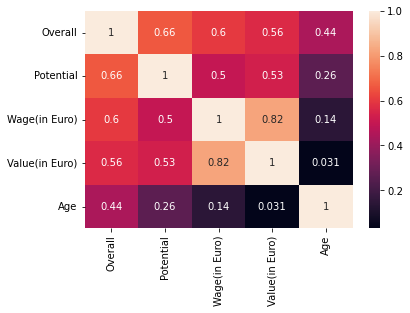

In [11]:
import seaborn as sns

sns.heatmap(corr, annot=True)

In [12]:
# Remove the correlations equal to 1.0 from the correlation matrix
corr = corr[corr!= 1.0]

In [13]:
corr.head()

,Overall,Potential,Wage(in Euro),Value(in Euro),Age
Overall,NaN,0.660630,0.599129,0.561642,0.442369
Potential,0.660630,NaN,0.497392,0.532835,0.263686
Wage(in Euro),0.599129,0.497392,NaN,0.822262,0.144251
Value(in Euro),0.561642,0.532835,0.822262,NaN,0.030662
Age,0.442369,0.263686,0.144251,0.030662,NaN


In [14]:
# Unstack the correlation matrix into a long format
unstacked = corr.unstack().reset_index()

In [15]:
# Sort the unstacked data by the correlation values in descending order
sorted_corr = unstacked.sort_values(by=0, ascending=False)

In [16]:
sorted_corr.head()

,level_0,level_1,0
13,Wage(in Euro),Value(in Euro),0.822262
17,Value(in Euro),Wage(in Euro),0.822262
5,Potential,Overall,0.660630
1,Overall,Potential,0.660630
10,Wage(in Euro),Overall,0.599129


In [17]:
from sklearn.cluster import KMeans

In [18]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)

KMeans(n_clusters=3)

In [19]:
# Get the centroids of the clusters
centroids = kmeans.cluster_centers_

In [20]:
# Create a Pandas DataFrame from the centroids and set the columns to the feature names
pd.DataFrame(centroids, columns = features)

,Overall,Potential,Wage(in Euro),Value(in Euro),Age
0,65.060295,70.337380,5825.953154,1.488555e+06,25.201915
1,85.315385,88.253846,141892.307692,6.970000e+07,25.769231
2,79.033643,82.244780,49795.939675,2.102958e+07,25.944316
